# Networks: Friends, Epidemics & Terrorists
## Handout for Active Learning Exercise #2

The goal of this ALE is to help you understand the basic concepts of network science and get acclimated to the `Networkx` (https://networkx.org/) library in Python.

In [ ]:
# Make sure you run this code cell everytime you open the notebook!
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions

## Paths

We will learn how to analyze the pathology of a network with code. We will first create a sample network G, and then use NetworkX package to analyze this network.

In [ ]:
# Create a network with 4 nodes to analyze
G = nx.Graph([(1, 2), (2, 4), (2, 3), (3, 4), (3,1)])

In [ ]:
# A function defined for simple plotting
def plot_graph(G):
  pos = nx.drawing.layout.circular_layout(G)
  plt.figure(figsize=(6,5))                                                             # Specify the figure size
  nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green') # The figure properties
  plt.show()                                                                            # Show the network

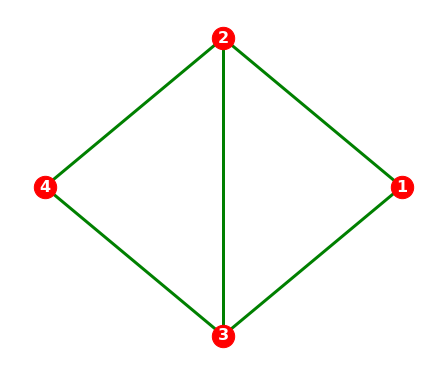

In [ ]:
# Visualize the network
plot_graph(G)

### Simple Path

In networks physical distance is replaced by path length. A path is a route that runs along the links of the network. We define a simple path in a network as a nonempty sequence of nodes in which no node appears more than once in the sequence, and each adjacent pair of nodes in the sequence is adjacent in the network. A path’s length represents the number of links the path contains. 

In [ ]:
paths = nx.all_simple_paths(G, source=1, target=3) # Generate all simple paths in the network G from source=1 to target=3.
paths = list(paths)                                # Store all paths in a list
print("All possible paths between nodes 1 and 3 are: ", paths)      # Print out all paths between 1 and 3     
print("The number of paths between nodes 1 and 3 is: ", len(paths)) # Print out the number of paths between 1 and 3

All possible paths between nodes 1 and 3 are:  [[1, 2, 4, 3], [1, 2, 3], [1, 3]]
The number of paths between nodes 1 and 3 is:  3


You can generate only those paths that are shorter than a certain length by using the `cutoff` keyword argument:


In [ ]:
# Only find paths of length less than or equal to 2
paths = nx.all_simple_paths(G, source=1, target=3, cutoff=2)                           # Filter out all simple paths with distance<=2
print("All possible paths between nodes 1 and 3 with distance<=2 are: ", list(paths))  # Print out all paths with distance<=2

All possible paths between nodes 1 and 3 with distance<=2 are:  [[1, 2, 3], [1, 3]]


You can obtain the paths in the form of a list of links:

In [ ]:
paths = nx.all_simple_edge_paths(G, 1, 3) # Generate all simple paths in the graph G from source=1 to target=3.
print(list(paths))                        # Print out all links for the paths

[[(1, 2), (2, 4), (4, 3)], [(1, 2), (2, 3)], [(1, 3)]]


To verify if a specific path exists between 2 nodes we use:

In [ ]:
nx.is_simple_path(G, [2, 3, 0]) # Check if a simple path exists between nodes 2 and 0 that passes through 3

False

In [ ]:
nx.is_simple_path(G, [1,2,3])  # Check if a simple path exists between nodes 1 and 3 that passes through 2

True

### Shortest Path

The path with the shortest distance d between two nodes. We also call d the distance between two nodes. You can find a shortest path between two nodes using: 

In [ ]:
print(nx.shortest_path(G, source=1, target=4))        # A shortest path from source=1 to target=4

[1, 2, 4]


Here is another way to find a shortest path between two nodes:

In [ ]:
p = nx.shortest_path(G)  # Source and target are not specified
p[1][4]                  # A shortest path from source=1 to target=4

[1, 2, 4]

Note that the shortest path does not need to be unique. You can find all shortest paths using:

In [ ]:
# Compute all shortest paths in the graph between 2 specific nodes.
min_paths = list(nx.all_shortest_paths(G, source=1, target=4))  # Find all shortest path from 1 to 4
print(min_paths)               # All shortest paths from source=1 to target=4
print(len(min_paths))          # Number of shortest paths from source=1 to target=4

[[1, 2, 4], [1, 3, 4]]
2


We can find the shortest path length (i.e., distance) between two nodes using:

In [ ]:
# To get the length of shortest path
nx.shortest_path_length(G, source=1, target=4)      # The distance from 1 to 4

2

### Diameter

The diameter of a network, denoted by $d_{max}$, is the maximum shortest path in the network. In other words, it is the largest distance recorded between any pair of nodes. You can get the diameter of a network using:

In [ ]:
nx.diameter(G)          # The diameter of the network

2

### Average Path Length
You can get the average of the shortest paths between all pairs of nodes using:

In [ ]:
nx.average_shortest_path_length(G)       # The average path length of the network   

1.1666666666666667

## Cycle

To find a cycle within a (directed or undirected network), the `find_cycle` function will return a list of edges indicating a cyclic path. The function has one optional parameter, "orientation", which you can set to "orginal", "ignore", or "None". When set to ‘ignore’, every edge is treated as undirected. When set to ‘original’, every edge is treated as directed. If orientation is None, the yielded edge has no direction indicated. The direction is respected, but not reported.

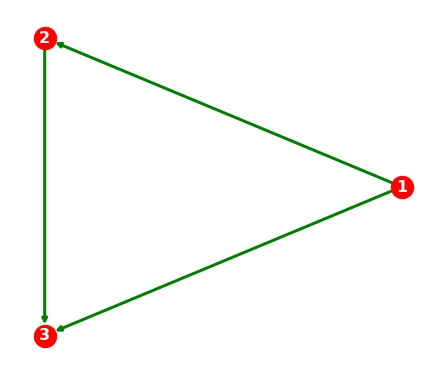

[(1, 2, 'forward'), (2, 3, 'forward'), (1, 3, 'reverse')]

In [ ]:
DG = nx.DiGraph([(1, 2), (1, 3), (2, 3)]) # Create a Directed Graph
plot_graph(DG)
nx.find_cycle(DG, orientation="ignore")   # Will return an error if orientation="original" since the direction matters in Directed networks

A simple cycle is a closed path where no intermediate node appears twice. You can find all simple cycles of a directed graph using:



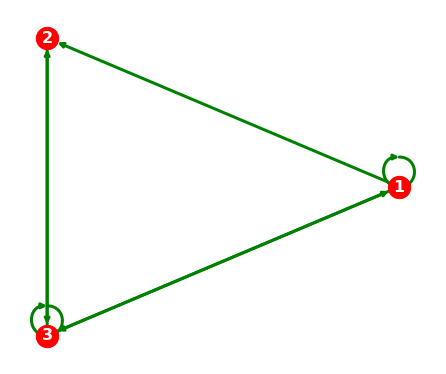

[[1], [1, 2, 3], [1, 3], [2, 3], [3]]

In [ ]:
links = [(1, 1), (1, 2), (1, 3), (2, 3), (3, 1), (3, 2), (3, 3)]
DG = nx.DiGraph(links)         # Create the directed network with given links
plot_graph(DG)
sorted(nx.simple_cycles(DG))   # Find all simple cycles for the directed network

Please note that self edges will also be reported as a cycle. Are they interesting though? In many cases, they are not. You can remove them as follows.  

In [ ]:
DH = DG.copy()
DH.remove_edges_from(nx.selfloop_edges(DG))
sorted(nx.simple_cycles(DH))

[[1, 2, 3], [1, 3], [2, 3]]

You can check whether a directed network is acyclic using:

In [ ]:
nx.is_directed_acyclic_graph(DG)        # Check if a directed network is acyclic

False

You can check whether an undirected network is a tree or a forest using:

In [ ]:
print(nx.is_tree(G))        # Check if our undirected network G is a tree
print(nx.is_forest(G))      # Check if our undirected network G is a forest

False
False


## Finding Distances: BFS (Breadth First Search)

BFS is a frequently used algorithm in network science. Similar to throwing a pebble in a pond and watching the ripples spread from it, BFS starts from a node and labels its neighbors, then the neighbors’ neighbors, until it reaches the target node. The number of “ripples” needed to reach the target provides the distance.

The algorithm provided will iterate over edges in a breadth-first-search starting at source, iterating through only those edges in the component reachable from this source. You can specify the maximum search depth by providing a value for the parameter. 

The NetworkX function for BFS here is only showing how the BFS algorithm is working. Please note that the BFS algorithm is used as part of many network analysis functions of NetworkX provided in this notebook.  

In [ ]:
bfs_from_1 = list(nx.bfs_edges(G, 1))     # Find the edges reachable from 1
print(bfs_from_1)

[(1, 2), (1, 3), (2, 4)]


In [ ]:
list(nx.bfs_edges(G, source=1, depth_limit=1))  # Find the edges reachable from 1 with 1 link

[(1, 2), (1, 3)]

## Connectivity
### Connectivity of Undirected Networks


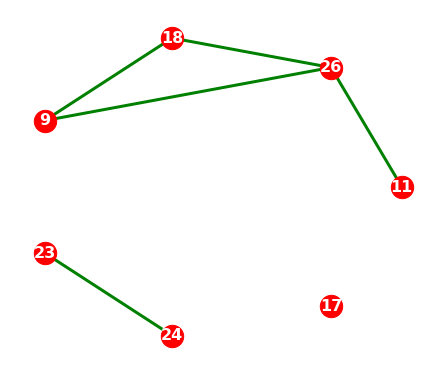

In [ ]:
# Create an undirected network to analyze
G = nx.Graph([(11,26),(26,18),(26,9),(9,18),(23,24)])
G.add_node(17)
plot_graph(G) # Visualize the network

We can do connectivity analysis of an undirected network using:

In [ ]:
# This function is used for undirected graphs only
components = list(nx.connected_components(G))                       # Create the list of connected components
print("List of components: ", components)                           # Print the list of components
print("The number of connected components in network G is:", len(components)) # Number of components
print("The largest component is: ", max(components, key=len))       # Largest component of network
print("The smallest component is: ", min(components, key=len))      # Smallest component of network
print("Network is connected?:", nx.is_connected(G))                 # Check whether the network is connected

List of components:  [{18, 9, 26, 11}, {24, 23}, {17}]
The number of connected components in network G is: 3
The largest component is:  {18, 9, 26, 11}
The smallest component is:  {17}
Network is connected?: False


### Connectivity for Directed Networks

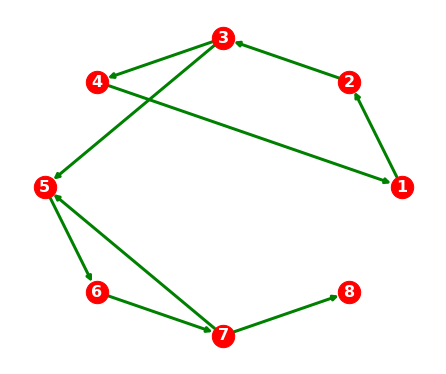

In [ ]:
DG = nx.DiGraph()            # Create a directed cyclic graph  
nx.add_cycle(DG, [1,2,3,4])  # Add a cycle between 1, 2, 3, and 4 to the network                       
nx.add_cycle(DG, [5,6,7])    # Add a cycle between 4, 5, and 6 to the network                    
DG.add_edges_from([(7,8),(3,5)])
# Visualize the Graph
plot_graph(DG)

We can do connectivity analysis of a directed network using:

In [ ]:
print("DG network is weakly connected?:", nx.is_weakly_connected(DG))           # Check whether the directed network is weakly connected
print("DG network is strongly connected?:", nx.is_strongly_connected(DG))       # Check whether the directed network is strongly connected
scc = list(nx.strongly_connected_components(DG))                                # Find the strongly connected components
print("List of strongly connected components in DG: ", scc)                     # Print the list of strongly connected components
print("Largest strongly connected components in DG: ", max(scc, key=len))       # Largest SCC
# You can also eliminate the trivial scc (i.e., individual nodes)  
print("Non-trivial strongly connected components in DG: ", sorted(comps for comps in scc if len(comps) > 1)) 
                          


DG network is weakly connected?: True
DG network is strongly connected?: False
List of strongly connected components in DG:  [{8}, {5, 6, 7}, {1, 2, 3, 4}]
Largest strongly connected components in DG:  {1, 2, 3, 4}
Non-trivial strongly connected components in DG:  [{5, 6, 7}, {1, 2, 3, 4}]


In [ ]:
wcc = list(nx.weakly_connected_components(DG))
print("List of weakly connected components in DG: ", wcc)                # Print the list of weakly connected components
print("Largest weakly connected components in DG: ", max(wcc, key=len))  # Largest WCC

List of weakly connected components in DG:  [{1, 2, 3, 4, 5, 6, 7, 8}]
Largest weakly connected components in DG:  {1, 2, 3, 4, 5, 6, 7, 8}


## Clustering Coefficient
### Local Clustering Coefficient
You can compute the local clustering coefficient for a specific node using:

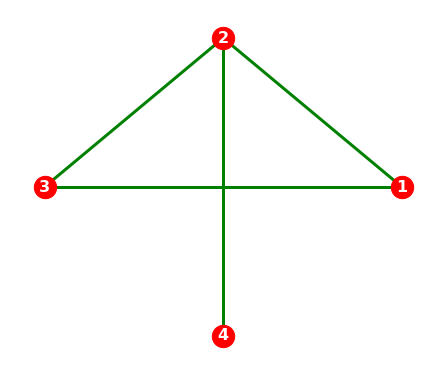

{1: 1.0, 2: 0.3333333333333333, 3: 1.0, 4: 0}
1.0


In [ ]:
G = nx.Graph()                                                # Construct an undirected graph
G.add_edges_from([(1, 2), (1,3), (2,3), (2,4)])               # Add the links
plot_graph(G)
print(nx.clustering(G))           # The local clustering coefficients of all nodes
print(nx.clustering(G, 1))        # The local clustering coefficient of node 1

### Average Clustering Coefficient
You can find the average clustering coefficient of a graph using:

In [ ]:
print(nx.average_clustering(G))       # Average clustering coefficient

0.5833333333333333


### Global Clustering Coefficient
Global clustering coefficient measures the ratio of total number of closed triangles to all possible triplets in a network. It is used as a measure of network clustering. First we will provide a function, and then use it on a network.




In [ ]:
from itertools import combinations

def global_clustering_coefficient(G):                         # A function for finding global clustering coefficient
    """
    Explicitly enumerate every open triangle.
    """
    open_triangle_nodes = []
    for node in list(G.nodes):
      neighbors = set(G.neighbors(node))
      for n1, n2 in combinations(neighbors, 2):
          if not G.has_edge(n1, n2):
              open_triangle_nodes.append([n1, node, n2])
    
    triangles=sum(nx.triangles(G).values())/3
    return 3*triangles/(3*triangles+len(open_triangle_nodes))

In [ ]:
print("Global Clustering Coefficient:", global_clustering_coefficient(G)) # Print the global clustering coefficient

Global Clustering Coefficient: 0.6


## Bipartite Networks
Bipartite networks B = (U, V, E) have two node sets U, V and links in E that only connect nodes from different sets. 

NetworkX does not have a custom bipartite graph class but the Graph() or DiGraph() classes can be used to represent bipartite graphs. However, you have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set. The convention used in NetworkX is to use a node attribute named bipartite with values 0 or 1 to identify the sets each node belongs to. 

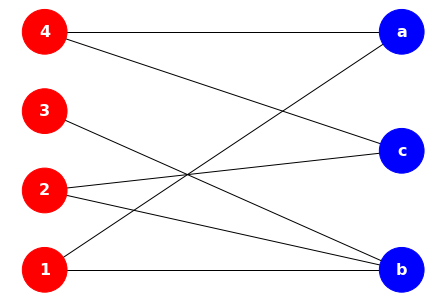

In [ ]:
# Create a bipartite network
BG = nx.Graph()
# Add nodes with the node attribute "bipartite"
BG.add_nodes_from([1, 2, 3, 4], bipartite=0)
BG.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
BG.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "b"), (4, "a"), (4,"c")])

# Plot the bipartite network
top = nx.bipartite.sets(BG)[0]
pos = nx.bipartite_layout(BG, top)
nx.draw(BG, pos=pos, with_labels=True, node_size=2000, node_color=['red','red','red','red','blue','blue','blue'], \
        font_color="white", font_weight="bold", font_size=16)
plt.show()

In [ ]:
# To verify if a graph is bipartite
print("BG is a bipartite graph: ", nx.bipartite.is_bipartite(BG))
print("G is a bipartite graph: ", nx.bipartite.is_bipartite(G))

BG is a bipartite graph:  True
G is a bipartite graph:  False


### Incidence Matrix
Let G = (U, V, E) be a bipartite graph with node sets $U = u_{1},...,u_{r}$ and $V = v_{1},...,v_{s}$. The incidence (biadjacency) matrix is the r x s matrix B in which $b_{i,j} = 1$ if, and only if, $(u_i, v_j)$ in E. 

You can obtain the incidence matrix using

In [ ]:
U=[1,2,3,4]
V=["a","b","c"]
A=nx.bipartite.biadjacency_matrix(BG, U, V)     # Put the list of "member" nodes in row order
print(A.todense())                              # Return matrix in readable format        

[[1 1 0]
 [0 1 1]
 [0 1 0]
 [1 0 1]]


### Projections

You can obtain the graph G that is the projection of the bipartite graph B onto the specific nodes. They retain their attributes and are connected in G if they have a common neighbor in B. Please note that after finding projections of a bigraph you can do the network analysis for each projection separately.

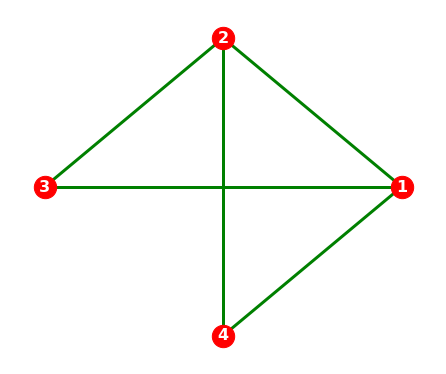

List of edges: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]
Degree of nodes: [(1, 3), (2, 3), (3, 2), (4, 2)]


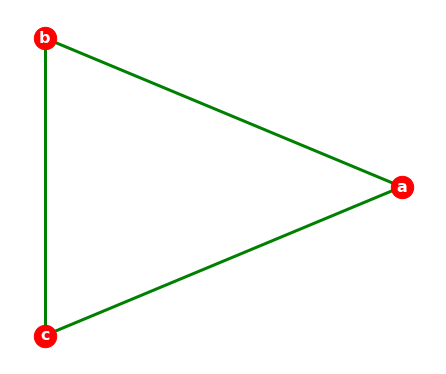

List of edges: [('a', 'c'), ('a', 'b'), ('b', 'c')]
Degree of nodes: [('a', 2), ('b', 2), ('c', 2)]


In [ ]:
G = nx.bipartite.projected_graph(BG, [1, 2, 3, 4])     # Create G, the projection of group G nodes
list(G)                                             # List of nodes in group G
plot_graph(G)                                       # Plotting projection of group G
print("List of edges:", list(G.edges()))                              # Edges for nodes of G
print("Degree of nodes:", G.degree())

H = nx.bipartite.projected_graph(BG, ["a","b","c"])    # Similar process, but for group H nodes
list(H)                                             
plot_graph(H)
print("List of edges:", list(H.edges()))
print("Degree of nodes:", H.degree())


## Multilayer Networks

### Multiplex Networks

Multilayer networks can be used to represent various types network generalizations found in the literature. For example, multiplex networks, temporal networks, networks of networks, and interdependent networks are all types of multilayer networks. 

In [ ]:
# DON'T MODIFY THIS CODE! 
# MAKE SURE TO RUN THIS CELL SO YOU CAN IMPLEMENT THE MULTILAYER NETWORKS BELOW!

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='k', alpha=0.3, linestyle='--', zorder=2)

        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)

## Plotting a multilayer network.

You can use the following code to plot a multilayer network.

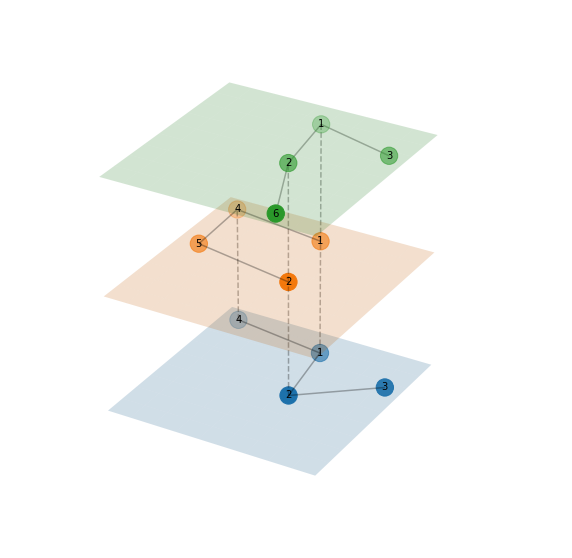

In [ ]:
# THIS IS THE CODE CHUNK YOU CAN USE AND CHANGE:
if __name__ == '__main__':
    # Define Networks
    g = nx.Graph([(1,2),(1,4),(2,3)])
    h = nx.Graph([(4,5),(1,4),(2,5)])
    i = nx.Graph([(1,2),(1,3),(2,6)])

    # Provide the list of nodes ID, or node labels, you want to have
    node_labels = {nn : str(nn) for nn in range(7)}

    # Initialise figures and plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([g, h, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()


## Dynamic Networks
We will construct and analyze dynamic networks using the edge attribute `timestamp`.


### Creating a Dynamic Network
G can be grown by adding one interaction at a time. Every interaction is univocally defined by its endpoints, u and v, as well as its timestamp t. Interaction list can also be added: in such scenario all the interactions in the list will have a same timestamp (i.e. they will belong to a same network snapshot).

At time t1: 



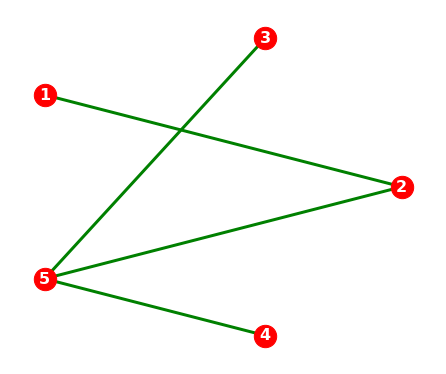

At time t2: 



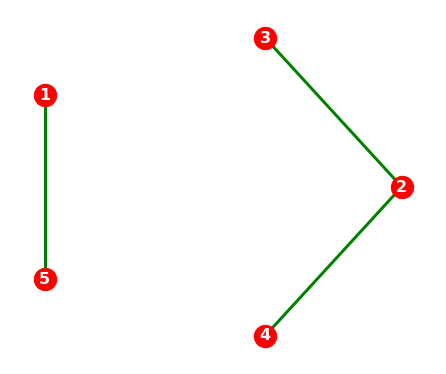

In [ ]:
G = nx.Graph()                                                  # Use timestamp attribute to mark the snapshot
G.add_edges_from([(2,3),(2, 1),(3,5),(4,5),(2,5)], timestamp="t1")    # Add many edges from snapshot of graph at time t1
#plot_graph(G)

G.add_edges_from([(2,3),(1,5),(2,4)], timestamp="t2")    # Add many edges from snapshot of graph at time t2

print("At time t1: \n")
E1 = [(u,v) for (u,v, data) in G.edges(data=True) if data.get("timestamp") == "t1"]       # Extract edges of G at time t1
G_t1 = G.edge_subgraph(E1)                                                                # Snapshot (subgraph) of G at t1
plot_graph(G_t1)                                                                          # Plot slice of graph at t1

print("At time t2: \n")
E2 = [(u,v) for (u,v, data) in G.edges(data=True) if data.get("timestamp") == "t2"]       # Extract nodes of G at time t2
G_t2 = G.edge_subgraph(E2)                                                                # Snapshot (subgraph) of G at t2
plot_graph(G_t2)                                                                          # Plot slice of G at t2

In [ ]:
print("The edges of dynamic network at time t=t1 are: ",G_t2.edges())            # Get all nodes at time t=t2
print("The number of interactions of dynamic graph at time t=t2 is: ",len(E2))   # Get the number of links at time t=2

The edges of dynamic network at time t=t1 are:  [(2, 3), (2, 4), (1, 5)]
The number of interactions of dynamic graph at time t=t2 is:  3


## Network Analysis
We will analyze different types of network using the concepts introduced above. We will combine the code above to perform all the network creation and analysis together. We will provide code for three network types: Undirected, Directed and Weighted.

### Undirected Network

We will first create an undirected network, and then perform analysis on that network.

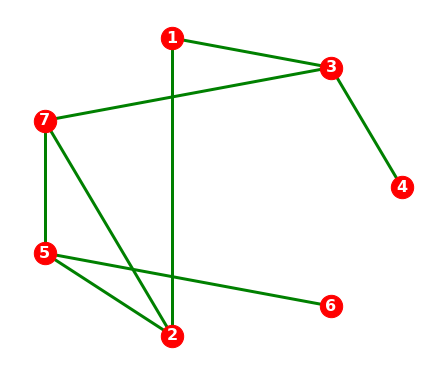

In [ ]:
G=nx.Graph()
G.add_edges_from([(4,3),(3,1),(3,7),(7,5),(7,2),(1,2),(2,5),(5,6)])       # Example Undirected Network
plot_graph(G)                                                            # Plot the network   

###Undirected Network Analysis

In [ ]:
print("Shortest path length between 1 and 5:", nx.shortest_path_length(G, source=1, target=5))  # Shortest path length between nodes 1 and 5
print("List of all shortest paths between 1 and 5: ", nx.shortest_path(G, source=1, target=5))   # All the paths that give minimum distance between each pair of node               
print("The average path length of the network: ", nx.average_shortest_path_length(G))            # Average Path Length     
print("The diameter of the network: ", nx.diameter(G))                                           # Diameter

try:
    print("Cycle(s) identifies in network : ", nx.find_cycle(G))   # Find a cycle in an undirected network
except:
    print("No cycle found. The network is acyclic.")
print("Network is a tree?:", nx.is_tree(G))

components = list(nx.connected_components(G))
print("The number of connected components in Graph G is:", len(components))             # Number of components
print("The largest connected component is: ", max(components, key=len))                 # Largest component
print("This network is connected?: ", nx.is_connected(G))                               # Check for connectedness                                                           # Check whether the network is connected

print("The local clustering coefficients of all nodes ", nx.clustering(G))              # The local clustering coefficients of all nodes
print("Average clustering coefficient: ", nx.average_clustering(G))                     # Average clustering coefficient
print("Global Clustering Coefficient:", global_clustering_coefficient(G))               # Globalclustering coefficient. 

Shortest path length between 1 and 5: 2
List of all shortest paths between 1 and 5:  [1, 2, 5]
The average path length of the network:  1.9047619047619047
The diameter of the network:  4
Cycle(s) identifies in network :  [(3, 1), (1, 2), (2, 7), (7, 3)]
Network is a tree?: False
The number of connected components in Graph G is: 1
The largest connected component is:  {1, 2, 3, 4, 5, 6, 7}
This network is connected?:  True
The local clustering coefficients of all nodes  {4: 0, 3: 0, 1: 0, 7: 0.3333333333333333, 5: 0.3333333333333333, 2: 0.3333333333333333, 6: 0}
Average clustering coefficient:  0.14285714285714285
Global Clustering Coefficient: 0.23076923076923078


### Directed Network


We will first create a directed network, and then perform analysis on that network.

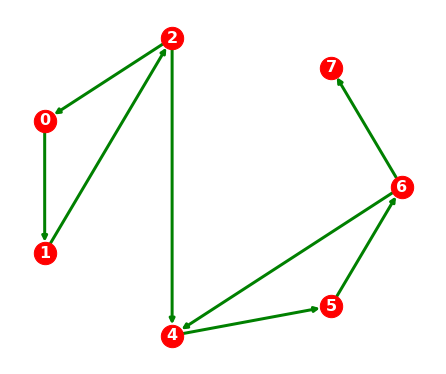

In [ ]:
# Create a Directed cyclic graph
DG = nx.DiGraph()
DG.add_edges_from([(6,7),(2,0),(0,1),(1,2),(2,4),(6,4),(4,5),(5,6)])

# Visualize the Graph
plot_graph(DG)

### Directed Network Analysis

In [ ]:
# Shortest path length and shortest path list between nodes 1 and 5. 
try:
    print("Shortest path length between 1 and 5:", nx.shortest_path_length(DG, source=1, target=5))   
    print("List of all shortest paths between 1 and 5:", nx.shortest_path(DG, source=1, target=5))  
except: 
    print("No path found between 1 and 5")

print("List of all shortest paths: ", nx.shortest_path(DG)) # All the paths that give minimum distance between each pair of node               

# Average Path Length. NetworkX will assign 0 (instead of infinity) if a link does not exist. They will fix this error in the future.     
print("The average path length of the network: ", nx.average_shortest_path_length(DG))  

try: # Diameter. 
    print("The diameter of the network: ", nx.diameter(DG))
except:
    print("Cannot calculate diameter of network. No path found between several nodes.")                                

try: # Simple cycles                                                                                   
    print("Cycles identifies in network : ", list(nx.simple_cycles(DG)))  
except:
    print("No cycle found.")
print("This network is acyclic: ", nx.is_directed_acyclic_graph(DG))            # Check if network is acyclic

print("This network is strongly connected: ", nx.is_strongly_connected(DG))                                             # Check whether the directed network is strongly connected
scc = list(nx.strongly_connected_components(DG))
print("The number of strongly connected components in Graph DG is:", len(scc))   # Number of components
print("List of strongly connected components in DG: ", scc)                      # Print the list of strongly connected components
print("Largest strongly connected component in DG: ", max(scc, key=len))         # Largest SCC (one of them)

print("This network is weakly connected: ", nx.is_weakly_connected(DG))                                               # Check whether the directed network is weakly connected
wcc = list(nx.weakly_connected_components(DG))
print("The number of weakly connected components in Graph DG is:", len(wcc))     # Number of components
print("List of weakly connected components in DG: ", wcc)                        # Print the list of weakly connected components
print("Largest weakly connected components in DG: ", max(wcc, key=len))          # Largest WCC                              

print("The local clustering coefficients of all nodes: ", nx.clustering(DG))    # The local clustering coefficients of all nodes
print("Average clustering coefficient: ", nx.average_clustering(DG))            # Average clustering coefficient

Shortest path length between 1 and 5: 3
List of all shortest paths between 1 and 5: [1, 2, 4, 5]
List of all shortest paths:  {6: {6: [6], 7: [6, 7], 4: [6, 4], 5: [6, 4, 5]}, 7: {7: [7]}, 2: {2: [2], 0: [2, 0], 4: [2, 4], 1: [2, 0, 1], 5: [2, 4, 5], 6: [2, 4, 5, 6], 7: [2, 4, 5, 6, 7]}, 0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 4: [0, 1, 2, 4], 5: [0, 1, 2, 4, 5], 6: [0, 1, 2, 4, 5, 6], 7: [0, 1, 2, 4, 5, 6, 7]}, 1: {1: [1], 2: [1, 2], 0: [1, 2, 0], 4: [1, 2, 4], 5: [1, 2, 4, 5], 6: [1, 2, 4, 5, 6], 7: [1, 2, 4, 5, 6, 7]}, 4: {4: [4], 5: [4, 5], 6: [4, 5, 6], 7: [4, 5, 6, 7]}, 5: {5: [5], 6: [5, 6], 7: [5, 6, 7], 4: [5, 6, 4]}}
The average path length of the network:  1.5714285714285714
Cannot calculate diameter of network. No path found between several nodes.
Cycles identifies in network :  [[0, 1, 2], [4, 5, 6]]
This network is acyclic:  False
This network is strongly connected:  False
The number of strongly connected components in Graph DG is: 3
List of strongly connected components in 

### Weighted Network (Undirected Version)
Recall that in weighted networks links can have different values attached to them. In a weighted network case, you can also record how long did a phone conversation take using network weights. Please note that we can create a weighted network for both undirected and directed networks. We will first create a weighted network, and then perform network analysis.

In [ ]:
WG = nx.Graph()                     # Construct an undirected graph
WG.add_weighted_edges_from([(1, 2, 2), (1,3,0.5), (2,3,1), (2,4,4),(4,5,2),(2,6,0.8),(4,7,7)])  # Add the links. Weight=3rd number

The plot of the weighted network: 



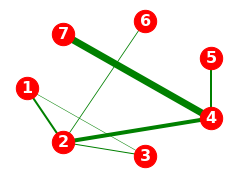

In [ ]:
print("The plot of the weighted network: \n")    

widths = nx.get_edge_attributes(WG, 'weight')   # Set the width of links as the weights
nodelist = WG.nodes()                           # List of nodes
plt.figure(figsize=(4,3))                       # Set the figue size   
pos = nx.shell_layout(WG)                       # Set the position os the nodes

# Plot the nodes
nx.draw_networkx_nodes(WG,pos, nodelist=nodelist, node_size=500, node_color='red', alpha=1)

# Plot the edges
nx.draw_networkx_edges(WG,pos, edgelist = widths.keys(), width=list(widths.values()), edge_color='green', alpha=1)

# Plot the labels
nx.draw_networkx_labels(WG, pos=pos, font_size=16, font_weight='bold', labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
plt.box(False)
plt.show()

### Undirected Weighted Network Analysis

In [ ]:
print("Shortest path length between 1 and 5:", nx.shortest_path_length(WG, source=1, target=5, weight='weight'))
print("List of all shortest paths between 1 and 5:", nx.shortest_path(WG, source=1, target=5, weight='weight')) # All the paths that give minimum distance between each pair of node               

print("List of all shortest paths:", nx.shortest_path(WG, weight='weight')) # All the paths that give minimum distance between each pair of node               

print("The average path length of the network:", nx.average_shortest_path_length(WG,weight='weight'))   # Average Path Lengths     

# Find diameter and print it
A=dict(nx.shortest_path_length(WG, weight='weight'))
shortestpaths = [max(A[k].values()) for k in sorted(A.keys())]
print("The diameter of the network:", max(shortestpaths))

try:
    print("Cycle(s) identifies in network : ", nx.find_cycle(WG))  
except:
    print("No cycle found. The network is acyclic.")
print("Network is a tree?:", nx.is_tree(WG))

print("The local clustering coefficients of all nodes ", nx.clustering(WG, weight='weight'))     # The local clustering coefficients of all nodes
print("Average clustering coefficient: ", nx.average_clustering(WG, weight='weight'))            # Average clustering coefficient

components = list(nx.connected_components(WG))
print("The number of connected components in Graph WG is:", len(components))             # Number of components
print("The largest connected component is:", max(components, key=len))                   # Largest component
print("This network is connected?:", nx.is_connected(WG))                                # Check for connectedness                                                           # Check whether the network is connected

Shortest path length between 1 and 5: 7.5
List of all shortest paths between 1 and 5: [1, 3, 2, 4, 5]
List of all shortest paths: {1: {1: [1], 2: [1, 3, 2], 3: [1, 3], 4: [1, 3, 2, 4], 6: [1, 3, 2, 6], 5: [1, 3, 2, 4, 5], 7: [1, 3, 2, 4, 7]}, 2: {2: [2], 1: [2, 3, 1], 3: [2, 3], 4: [2, 4], 6: [2, 6], 5: [2, 4, 5], 7: [2, 4, 7]}, 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 2, 4], 6: [3, 2, 6], 5: [3, 2, 4, 5], 7: [3, 2, 4, 7]}, 4: {4: [4], 2: [4, 2], 5: [4, 5], 7: [4, 7], 1: [4, 2, 3, 1], 3: [4, 2, 3], 6: [4, 2, 6]}, 5: {5: [5], 4: [5, 4], 2: [5, 4, 2], 7: [5, 4, 7], 1: [5, 4, 2, 3, 1], 3: [5, 4, 2, 3], 6: [5, 4, 2, 6]}, 6: {6: [6], 2: [6, 2], 1: [6, 2, 3, 1], 3: [6, 2, 3], 4: [6, 2, 4], 5: [6, 2, 4, 5], 7: [6, 2, 4, 7]}, 7: {7: [7], 4: [7, 4], 2: [7, 4, 2], 5: [7, 4, 5], 1: [7, 4, 2, 3, 1], 3: [7, 4, 2, 3], 6: [7, 4, 2, 6]}}
The average path length of the network: 5.704761904761907
The diameter of the network: 12.5
Cycle(s) identifies in network :  [(1, 2), (2, 3), (3, 1)]
Network is a tr